In [1]:
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
uploaded = files.upload()

Saving TwitterDataPrepWithoutSentiAnalysisOpenData.csv to TwitterDataPrepWithoutSentiAnalysisOpenData.csv


In [7]:
# Reading the dataset
data = pd.read_csv('TwitterDataPrepWithoutSentiAnalysisOpenData.csv', encoding='utf-8') # Read the dataset
data.head(10)
df = data.copy()
df.drop('Unnamed: 0', axis=1,inplace=True)

<ipython-input-7-ee77f4585e4a>:2: DtypeWarning: Columns (0,1,6,7,10,14,15,20,22,23,24,25,26,33,34,38,40,47,48,66) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('TwitterDataPrepWithoutSentiAnalysisOpenData.csv', encoding='utf-8') # Read the dataset


In [8]:
df.columns

Index(['id_str', 'from_user', 'text', 'created_at', 'time', 'geo_coordinates',
       'user_lang', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
       'from_user_id_str', 'in_reply_to_status_id_str', 'source',
       'profile_image_url', 'user_followers_count', 'user_friends_count',
       'user_location', 'status_url', 'entities_str', 'contributors',
       'coordinates', 'entities', 'favorite_count', 'favorited', 'geo', 'id',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'metadata',
       'place', 'possibly_sensitive', 'retweet_count', 'retweeted',
       'truncated', 'user_contributors_enabled', 'user_created_at',
       'user_default_profile', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_follow_request_sent',
       'user_following', 'user_geo_enabled', 'user_id', 'user_id_str',
       'user_is_translation_enabled', 'user_is_translator',
       'user_listed_count', 'user_name', 'user_notifications',
       'user_

In [9]:
# Percentage of null values
null_perc = df.isnull().sum()/df.shape[0]*100

In [10]:
#List of columns having more than 75% of null values
col_to_drop = null_perc[null_perc>75].keys()

In [11]:
col_to_drop

Index(['geo_coordinates', 'user_lang', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id_str', 'contributors',
       'coordinates', 'favorited', 'geo', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'place', 'possibly_sensitive', 'retweeted',
       'truncated', 'user_contributors_enabled', 'user_default_profile',
       'user_default_profile_image', 'user_follow_request_sent',
       'user_following', 'user_is_translation_enabled', 'user_is_translator',
       'user_notifications', 'user_profile_background_tile',
       'user_profile_location', 'user_protected', 'user_time_zone',
       'user_utc_offset', 'user_verified'],
      dtype='object')

In [12]:
df1 = df.drop(col_to_drop, axis=1)

In [13]:
#checking unique values
unique = df1.nunique()
# Columns with same values are removed as they cannot be considered as a variable

In [21]:
cols_to_drop = unique[unique==1].keys()

In [22]:
cols_to_drop

Index(['user_geo_enabled'], dtype='object')

In [18]:
#cols_to_drop = cols_to_drop.drop([ 'user_geo_enabled']) # Not removing retweet_count and favorite_count because these metrics are required for calculating the scores

In [23]:
df2 = df1.drop(cols_to_drop, axis=1)

# Creating new metrics from existing metrics

In [26]:
# Number of original tweets by all users in the topic
df2['original_count'] = df2['user_statuses_count']
N = df2['original_count'].sum()

In [ ]:
# As in_reply_to_screen_name variable has more than 97% of null values and therefore removed so reply_count cannot be calculated
# Metric: RP3: Number of users who have replied author’s tweets
#reply = df2[df2['in_reply_to_screen_name'].notnull()]
#df2reply = reply.groupby('in_reply_to_screen_name', sort=False)['usr_name'].count()
#reply['in_reply_to_screen_name'].str.count("flyethiopian").sum() # Cross-Checking

In [ ]:
#df2reply = pd.DataFrame(df2reply) # Converting to dataframe

In [ ]:
#df2reply.rename(columns = {'usr_name':'reply_count'}, inplace=True)
#df2reply.columns

Index(['reply_count'], dtype='object')

In [ ]:
#df3 = pd.merge(df2, df2reply, left_on='screen_name', right_on ='in_reply_to_screen_name', how='left')

In [ ]:
#df3.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'is_quote_status', 'retweet_count',
       'favorite_count', 'possibly_sensitive', 'usr_name', 'foll_count',
       'friends_count', 'fav_count', 'status_count', 'listed_count',
       'screen_name', 'original_count', 'reply_count'],
      dtype='object')

In [ ]:
#df2 = df3

Changing data types of variables to be used in calculating the scores

In [27]:
# remove all string values from a column using regex
df2['user_friends_count'] = df2['user_friends_count'].str.replace('\D','', regex = True)
df2['user_friends_count'] = df2['user_friends_count'].str.replace('\W','', regex = True)
df2['user_favourites_count'] = df2['user_favourites_count'].str.replace('\D','', regex = True)
df2['user_favourites_count'] = df2['user_favourites_count'].str.replace('\W','', regex = True)
df2['user_followers_count'] = df2['user_followers_count'].str.replace('\D','', regex = True)
#df2['user_followers_count'] = df2['user_followers_count'].str.replace('\d.','', regex = True) # Using this will remove all dots present in values including values with decimal values present
df2['user_followers_count'] = df2['user_followers_count'].str.replace('\W','', regex = True)


In [28]:
# Removing null values from the dataframe
df2.isnull().sum()
df2.dropna(subset = ['user_followers_count', 'user_friends_count','retweet_count','user_statuses_count', 'user_favourites_count'], inplace = True)


In [29]:
df2.dtypes

id_str                                      object
from_user                                   object
text                                        object
created_at                                  object
time                                        object
from_user_id_str                            object
source                                      object
profile_image_url                           object
user_followers_count                        object
user_friends_count                          object
user_location                               object
status_url                                  object
entities_str                                object
entities                                    object
favorite_count                              object
id                                          object
lang                                        object
metadata                                    object
retweet_count                              float64
user_created_at                

In [30]:
df2['user_followers_count'] = df2['user_followers_count'].astype(float)
df2['user_friends_count'] = df2['user_friends_count'].astype(float)
df2['user_favourites_count'] = df2['user_favourites_count'].astype(float)

Calculating influence score, popularity score, activity score and importance score

In [31]:
# Calculating the top users based on popularity.
df2['popularity'] = (df2['user_followers_count'] - df2['user_friends_count']) / (df2['user_followers_count'] + df2['user_friends_count'])

In [32]:
# Influence Score
df2['infl_score'] = (df2['retweet_count'] + df2['favorite_count']) / (df2['user_followers_count'] + df2['user_friends_count'])

In [33]:
# Activity Score
df2['activity_score'] = (df2['user_statuses_count'] + df2['retweet_count'] + df2['user_favourites_count'])/N

In [34]:
# Importance Score
df2['imp_score'] = (df2['popularity'] + df2['infl_score'] + df2['activity_score']) / 3

In [35]:
pos = df2

In [36]:
pos

,id_str,from_user,text,created_at,time,from_user_id_str,source,profile_image_url,user_followers_count,user_friends_count,...,user_profile_text_color,user_profile_use_background_image,user_screen_name,user_statuses_count,user_url,original_count,popularity,infl_score,activity_score,imp_score
8193,1.296850996363223e+18,Pierre_Markuse,"🟠 #Wildfires🔥 and smoke in #California, #USA🇺🇸...",Fri Aug 21 16:45:46 +0000 2020,21/08/2020 17:45:46,15147301.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1072769723...,61260.0,10020.0,...,333333,True,Pierre_Markuse,9373.0,https://pierre-markuse.net/,9373.0,0.718855,0.000856,4.079127e-04,0.24004
8194,1.2968487190196838e+18,SZ,Viele afrikanische Städte sind nur grob kartie...,Fri Aug 21 16:36:43 +0000 2020,21/08/2020 17:36:43,114508061.0,"<a href=""http://www.sueddeutsche.de/"" rel=""nof...",http://pbs.twimg.com/profile_images/1243573833...,16334650.0,4150.0,...,333333,NaN,SZ,162688.0,http://www.sz.de,162688.0,0.999492,0.000001,3.698349e-04,0.333288
8195,1.296844009181188e+18,mikewulder,📢 #OpenData now posted. 🌲🌽🛰️ 🇨🇦\nHarmonized La...,Fri Aug 21 16:18:00 +0000 2020,21/08/2020 17:18:00,400409011.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/7435988112...,41620.0,21830.0,...,333333,True,mikewulder,3436.0,https://www.researchgate.net/profile/Michael_W...,3436.0,0.311899,0.000189,1.938914e-04,0.104094
8196,1.2968421860724982e+18,PlateTobias,Das ist ein super Schritt. Gerade bei #OpenDat...,Fri Aug 21 16:10:45 +0000 2020,21/08/2020 17:10:45,3055254027.0,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1065890204...,6990.0,3710.0,...,333333,True,PlateTobias,758.0,NaN,758.0,0.306542,0.001121,7.762097e-05,0.10258
8197,1.296828019378729e+18,sergio_fajardo,La política de datos abiertos es crucial para ...,Fri Aug 21 15:14:28 +0000 2020,21/08/2020 16:14:28,25185308.0,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/9889712556...,15481860.0,3920.0,...,333333,True,sergio_fajardo,22203.0,NaN,22203.0,0.999494,0.000022,1.438491e-04,0.33322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,1.2121165241205842e+18,Pierre_Markuse,Enormous #bushfires🔥 in #NewSouthWales #Austra...,Tue Dec 31 21:01:14 +0000 2019,31/12/2019 21:01:14,15147301.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1072769723...,47760.0,8700.0,...,333333,True,Pierre_Markuse,7918.0,https://pierre-markuse.net/,7918.0,0.691817,0.001098,3.655176e-04,0.231094
16380,1.2121155143920722e+18,DrCloern,"As a new year begins, Limnology and Oceanograp...",Tue Dec 31 20:57:13 +0000 2019,31/12/2019 20:57:13,2790961759.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1174046127...,1060.0,260.0,...,333333,True,DrCloern,20.0,https://sfbay.wr.usgs.gov/access/wqdata/index....,20.0,0.606061,0.012121,4.372832e-07,0.206061
16381,1.2120933878993633e+18,InnovationCoSB,This was a great year for #innovation &amp; te...,Tue Dec 31 19:29:17 +0000 2019,31/12/2019 19:29:17,3188034121.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1191775146...,3510.0,4960.0,...,333333,True,InnovationCoSB,305.0,http://medium.com/innovation-in-south-bend,305.0,-0.171192,0.002243,1.087875e-06,-0.056316
16382,1.212091273844269e+18,mikewulder,📢New review: Nguyen et al. #Landsat #TimeSerie...,Tue Dec 31 19:20:53 +0000 2019,31/12/2019 19:20:53,400409011.0,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/7435988112...,33550.0,13070.0,...,333333,True,mikewulder,3148.0,https://www.researchgate.net/profile/Michael_W...,3148.0,0.439296,0.000622,1.698088e-04,0.146696


In [37]:
# Aggregating the users based on popularity, influence score, activity score and importance score
pos_pop = pos.groupby('user_screen_name', sort = False)['popularity'].agg('sum')
pos_infl = pos.groupby('user_screen_name', sort = False)['infl_score'].agg('sum')
pos_activity = pos.groupby('user_screen_name', sort = False)['activity_score'].agg('sum')
pos_imp = pos.groupby('user_screen_name', sort = False)['imp_score'].agg('sum')

In [38]:
# Converting the series into a dataframe
pos_pop = pd.DataFrame(pos_pop)
pos_infl = pd.DataFrame(pos_infl)
pos_activity = pd.DataFrame(pos_activity)
pos_imp = pd.DataFrame(pos_imp)

In [39]:
# Sorting the values based on popularity
pos_pop['popularity'].sort_values(ascending=False)[:10]

user_screen_name
Pierre_Markuse    145.250846
turicas            85.876698
WorldBank          74.966842
EU_opendata        55.428574
AlbankAldawli      34.984043
worldbankdata      31.595315
sentinel_hub       29.421287
SerendipiaData     28.551164
tonyveco           27.051055
Banquemondiale     25.913047
Name: popularity, dtype: float64

In [40]:
pos_infl['infl_score'].sort_values(ascending=False)[:10]

user_screen_name
isaacp3113        0.206667
questioningsal    0.192233
Pierre_Markuse    0.159504
happywindz        0.152839
PJACaytonPhD       0.15123
PeterTuths        0.130282
RicardoDGPS       0.113621
rburhum           0.111614
jhonbarrero       0.098829
jojo_aar          0.097297
Name: infl_score, dtype: object

In [41]:
pos_activity['activity_score'].sort_values(ascending=False)[:10]

user_screen_name
KirkDBorne        0.095930
Pierre_Markuse    0.081987
gomatama_mimi     0.061926
turicas           0.050771
EU_opendata       0.043973
OrdnanceSurvey    0.035437
evankirstel       0.028037
LAStools          0.017114
rapplerdotcom     0.016387
Pablo_Arreola     0.016307
Name: activity_score, dtype: float64

In [42]:
pos_imp['imp_score'].sort_values(ascending=False)[:10]

user_screen_name
Pierre_Markuse    48.497446
turicas              28.663
WorldBank         24.992438
EU_opendata       18.494205
AlbankAldawli     11.662228
worldbankdata      10.53265
sentinel_hub       9.812038
SerendipiaData       9.5272
tonyveco           9.043853
Banquemondiale     8.639054
Name: imp_score, dtype: object

In [43]:
pop_top10 = pd.DataFrame(pos_pop['popularity'].sort_values(ascending=False)[:10])


In [44]:
infl_pop_top10 = pd.DataFrame(pos_infl['infl_score'].sort_values(ascending=False)[:10])


In [45]:
activity_pop_top10 = pd.DataFrame(pos_activity['activity_score'].sort_values(ascending=False)[:10])

In [46]:
imp_top10 = pd.DataFrame(pos_imp['imp_score'].sort_values(ascending=False)[:10])

Bar plot of top 10 users based on:

1. Popularity

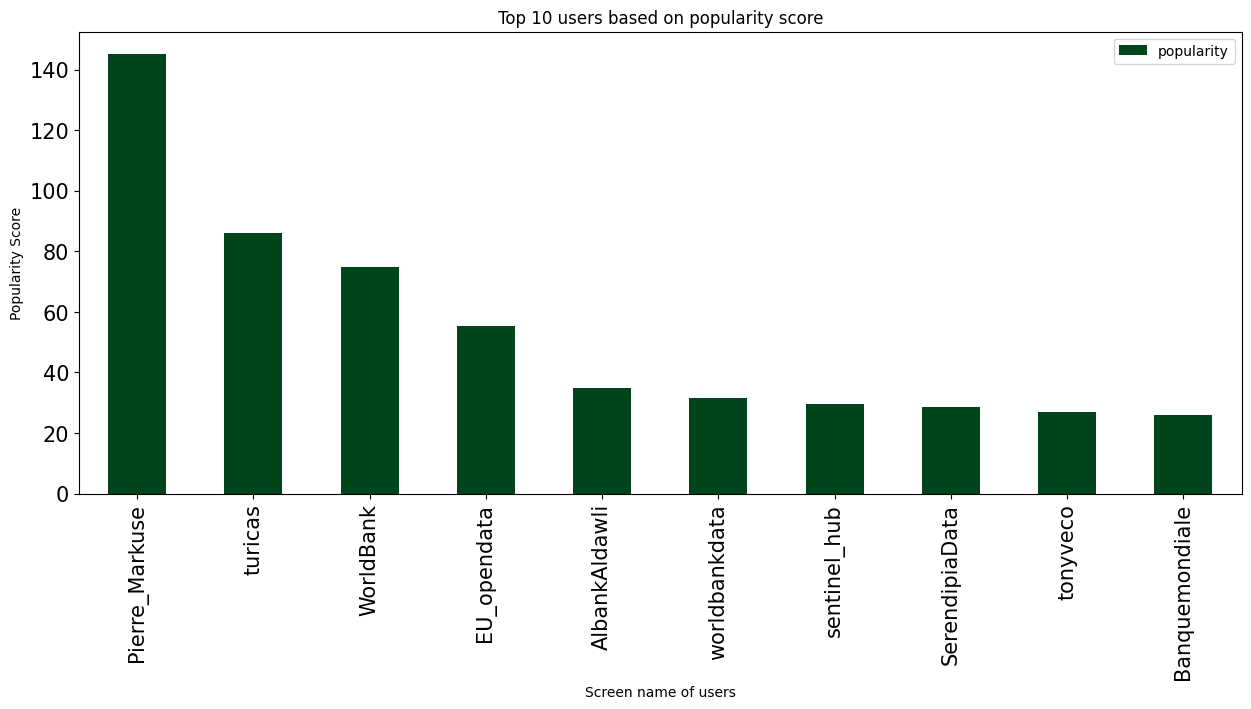

In [51]:
# Graph to plot top 10 popular people based on popularity
ax = pop_top10.plot(kind = 'bar', rot=0, colormap = 'Greens_r', figsize = (15,6), fontsize = 15)
ax.set_xlabel('Screen name of users')
ax.set_ylabel('Popularity Score')
plt.xticks(rotation=90)
plt.title("Top 10 users based on popularity score")
plt.savefig('top10UsersPopularityWithoutSentimentAnalysisOpenData.png', bbox_inches = 'tight')
plt.show()

2. Influence score

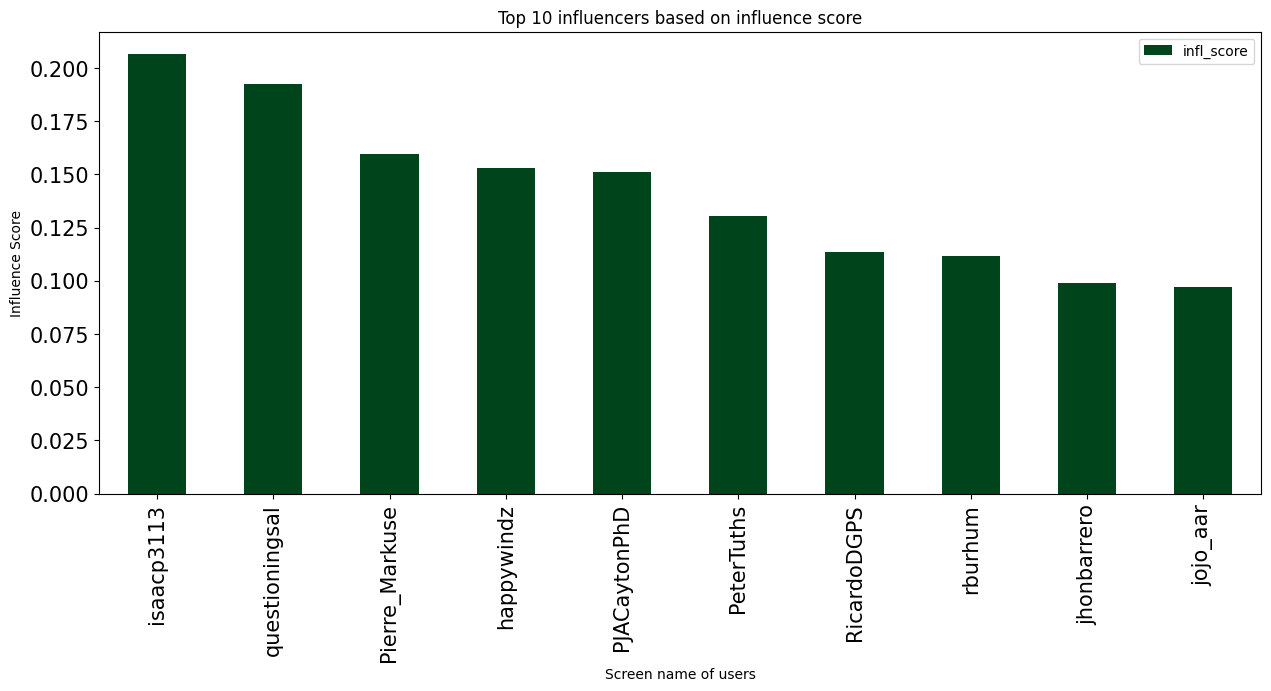

In [52]:
# Graph to plot top 10 influencers
ax = infl_pop_top10.plot(kind = 'bar', rot=0, colormap = 'Greens_r', figsize = (15,6), fontsize = 15)
ax.set_xlabel('Screen name of users')
ax.set_ylabel('Influence Score')
plt.xticks(rotation=90)
plt.title("Top 10 influencers based on influence score")
plt.savefig('top10UsersInfluenceWithoutSentimentAnalysisOpenData.png', bbox_inches = 'tight')
plt.show()


3. Activity score

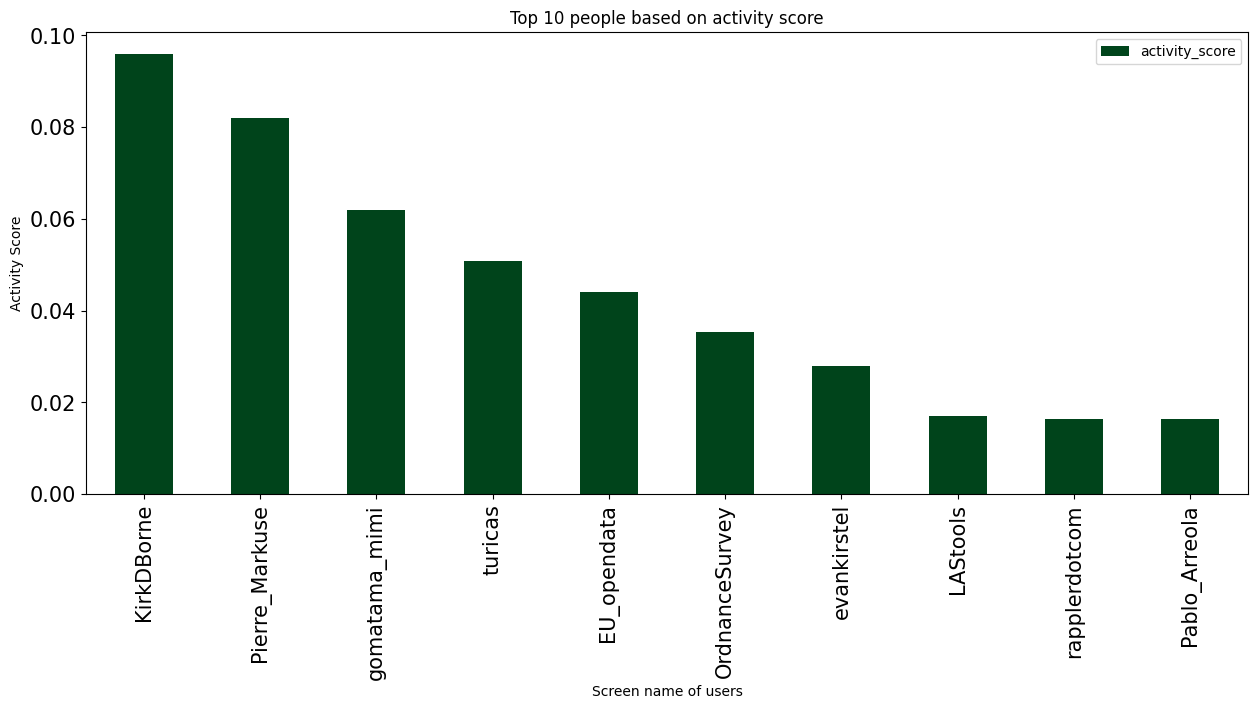

In [53]:
# Graph to plot top 10 active users
ax = activity_pop_top10.plot(kind = 'bar', rot=0, colormap = 'Greens_r', figsize = (15,6), fontsize = 15)
ax.set_xlabel('Screen name of users')
ax.set_ylabel('Activity Score')
plt.xticks(rotation=90)
plt.title("Top 10 people based on activity score")
plt.savefig('Top10UsersActivityWithoutSentimentAnalysisOpenData.png', bbox_inches = 'tight')
plt.show()

4. Importance score

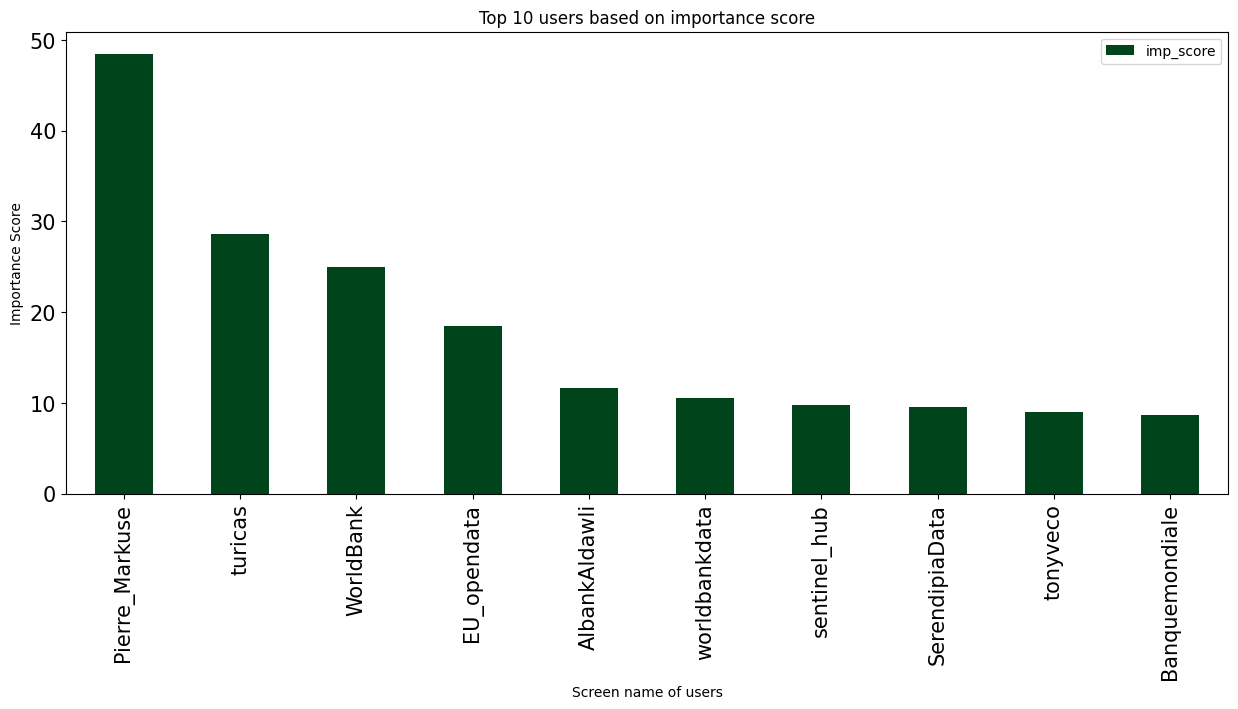

In [54]:
# Graph to plot top 10 important users
ax = imp_top10.plot(kind = 'bar', rot=0, colormap = 'Greens_r', figsize = (15,6), fontsize = 15)
ax.set_xlabel('Screen name of users')
ax.set_ylabel('Importance Score')
plt.xticks(rotation=90)
plt.title("Top 10 users based on importance score")
plt.savefig('Top10UsersImportanceWithoutSentimentAnalysisOpenData.png', bbox_inches = 'tight')
plt.show()

Finding Overall Sentiments of Top 10 users

In [ ]:
#names = ['laxradar', 'GlobalX_Tracker', "FlyingFreak73", 'makemytripcare', 'AboveStLouis','EaseMyTrip', 'rkabushenga', 'tan_tan_ch','BaagalaMargret', 'thetrickytrade', 'HaroonDvx', 'ImtiazA56745356', 'SatishJ45962597', 'jelly3615120332', 'adansi_health',
#'vkuppuluri532','EgriJakob','pravngupta', 'spieco1978', 'BaagalaMargret','MarchandSurgery','manilabulletin', 'united','tan_tan_ch','zeeshan_shah_dc','DTPORGE', 'dook42_domini','shecranes256','OfwonoOpondo','9mm_smg','ArenaJet','aparanjape','united']

In [ ]:
names = ['globalvoices', 'rkrystalli', 'Kirsty_Brimelow', 'nada52415352', 'magda22xx', 'salma5459654613','qa79er', 'Favstar_Bot', 'CockyColombians', 'julio_aliaga', 'JamesRoy', 'ColombiaMuisca', 'MedientanteMT', 'pcdnetwork','sequoia2001','Barreja', 'aribon86', 'jaras808', 'rkrystalli', 'Kirsty_Brimelow', 'nada52415352', 'magda22xx', 'salma5459654613', 'qa79er', 'CockyColombians', 'julio_aliaga']

In [ ]:
len(names)

26

In [ ]:
set1 = set(names)

In [ ]:
unique_set = list(set1)

In [ ]:
unique_set

['aribon86',
 'Kirsty_Brimelow',
 'CockyColombians',
 'nada52415352',
 'salma5459654613',
 'qa79er',
 'Favstar_Bot',
 'JamesRoy',
 'rkrystalli',
 'MedientanteMT',
 'pcdnetwork',
 'sequoia2001',
 'jaras808',
 'magda22xx',
 'Barreja',
 'globalvoices',
 'julio_aliaga',
 'ColombiaMuisca']

In [ ]:
top_users = pos.loc[pos['screen_name'].isin(unique_set)]
#top_users = pos.loc[pos['screen_name'] == 'laxradar']

In [ ]:
top_users

,created_at,id,id_str,text,source,truncated,user,is_quote_status,retweet_count,favorite_count,...,friends_count,fav_count,status_count,listed_count,screen_name,original_count,popularity,infl_score,activity_score,imp_score
5,2016-10-02 16:27:29+00:00,7.826180e+17,7.826180e+17,About time we get some motherfuckin' peace peo...,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 3004747605, 'id_str': '3004747605', 'na...",0.0,0.0,0.0,...,8,3767,1144,5,CockyColombians,1144,0.995890,0.0,0.000484,0.332125
8,2016-10-02 16:31:23+00:00,7.826190e+17,7.826190e+17,RT @GIS_Reports: Democratic institutions &amp;...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 3039596777, 'id_str': '3039596777', 'na...",0.0,0.0,0.0,...,431,62505,64233,212,jaras808,64233,-0.149333,0.0,0.012494,-0.045613
11,2016-10-02 16:35:44+00:00,7.826201e+17,7.826201e+17,I hope Colombians struggle through the storm &...,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 54369972, 'id_str': '54369972', 'name':...",0.0,0.0,0.0,...,1917,558,12316,191,Kirsty_Brimelow,12316,0.683872,0.0,0.001269,0.228380
22,2016-10-02 17:09:50+00:00,7.826287e+17,7.826287e+17,Retweeted alter eddie (@altereddie):\n\n#HoyVo...,"<a href=""http://www.facebook.com/twitter"" rel=...",0.0,"{'id': 52419142, 'id_str': '52419142', 'name':...",0.0,0.0,0.0,...,5000,45387,123221,46,Barreja,123221,-0.191469,0.0,0.016622,-0.058282
99,2016-10-02 19:27:44+00:00,7.826634e+17,7.826634e+17,Celebraremos en Bola8 Elephant and Castle from...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0.0,"{'id': 149981613, 'id_str': '149981613', 'name...",1.0,0.0,0.0,...,1177,111061,161416,89,ColombiaMuisca,161416,0.454840,0.0,0.026862,0.160567
109,2016-10-02 20:00:20+00:00,7.826716e+17,7.826716e+17,"#GVFace: After More than Five Decades of War, ...","<a href=""http://www.socialflow.com"" rel=""nofol...",0.0,"{'id': 794808, 'id_str': '794808', 'name': 'Gl...",0.0,0.0,0.0,...,1575,787,58983,4996,globalvoices,58983,0.963499,0.0,0.005892,0.323131
124,2016-10-02 20:20:03+00:00,7.826765e+17,7.826765e+17,Video474 https://t.co/UN8UavkmqJ #HoyVotoSi,"<a href=""http://futuretweets.com"" rel=""nofollo...",0.0,"{'id': 759319784559349760, 'id_str': '75931978...",0.0,0.0,0.0,...,235,86,1131,4,salma5459654613,1131,0.506303,0.0,0.000120,0.168807
143,2016-10-02 21:02:31+00:00,7.826872e+17,7.826872e+17,I cannot remember the last time I have been th...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0.0,"{'id': 29317977, 'id_str': '29317977', 'name':...",1.0,0.0,0.0,...,999,1747,15462,190,rkrystalli,15462,0.493536,0.0,0.001697,0.165078
156,2016-10-02 21:26:59+00:00,7.826934e+17,7.826934e+17,Retweeted https://t.co/txm6H9Wv0w (@PeriodChas...,"<a href=""http://www.facebook.com/twitter"" rel=...",0.0,"{'id': 128789031, 'id_str': '128789031', 'name...",0.0,0.0,0.0,...,2800,12372,154668,117,aribon86,154668,0.051491,0.0,0.016468,0.022653
167,2016-10-02 21:57:31+00:00,7.827011e+17,7.827011e+17,In case we had any doubt: Those who suffered v...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",1.0,"{'id': 29317977, 'id_str': '29317977', 'name':...",1.0,0.0,0.0,...,999,1747,15471,190,rkrystalli,15471,0.493408,0.0,0.001697,0.165035


In [ ]:
top_users['screen_name'].unique()

array(['CockyColombians', 'jaras808', 'Kirsty_Brimelow', 'Barreja',
       'ColombiaMuisca', 'globalvoices', 'salma5459654613', 'rkrystalli',
       'aribon86', 'julio_aliaga', 'Favstar_Bot', 'pcdnetwork',
       'sequoia2001', 'nada52415352', 'MedientanteMT', 'JamesRoy',
       'magda22xx', 'qa79er'], dtype=object)

In [ ]:
tweet_list = top_users

In [ ]:
tweet_list.columns

Index(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'user',
       'is_quote_status', 'retweet_count', 'favorite_count', 'entities',
       'timestamp_ms', 'retweeted_status', 'possibly_sensitive', 'usr_name',
       'foll_count', 'friends_count', 'fav_count', 'status_count',
       'listed_count', 'screen_name', 'original_count', 'popularity',
       'infl_score', 'activity_score', 'imp_score'],
      dtype='object')

In [ ]:
tw_list = tweet_list[['screen_name','text']]

In [ ]:
tw_list.columns

Index(['screen_name', 'text'], dtype='object')

In [ ]:
# Creating a function for cleaning the tweets. It will clean RT, link, punctuation, characters and finally convert to lowercase.
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

In [ ]:
# Call function to get Clean tweets
tw_list['cleanedtext'] = tw_list['text'].apply(lambda x : clean_tweet(x))
tw_list.cleanedtext.head(10)

<ipython-input-54-c1e79c4062ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_list['cleanedtext'] = tw_list['text'].apply(lambda x : clean_tweet(x))


5      about time we get some motherfuckin peace peop...
8      rt reports democratic institutions amp state p...
11     i hope colombians struggle through the storm a...
22     retweeted alter eddie hoyvotosi hoyvotosialapa...
99     celebraremos en bola8 elephant and castle from...
109    gvface after more than five decades of war col...
124                                   video474 hoyvotosi
143    i cannot remember the last time i have been th...
156        retweeted casanare y colombiavotasi hoyvotosi
167    in case we had any doubt those who suffered vi...
Name: cleanedtext, dtype: object

In [ ]:
#Calculating polarity, subjectivity using TextBlob
# Subjectivity quantifies the amount of personal opinion and factual information contained in the text.Higher subjectivity indicates that text contains personal opinion rather than factual information.
tw_list[['polarity', 'subjectivity']] = tw_list['cleanedtext'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))


<ipython-input-55-8f91899c46b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_list[['polarity', 'subjectivity']] = tw_list['cleanedtext'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
<ipython-input-55-8f91899c46b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_list[['polarity', 'subjectivity']] = tw_list['cleanedtext'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))


In [ ]:
tw_list.columns

Index(['screen_name', 'text', 'cleanedtext', 'polarity', 'subjectivity'], dtype='object')

Method 2: Sentiment Analysis

In [ ]:
# Calculating sentiment based on higher positive score or negative score
for index, row in tw_list['cleanedtext'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = "negative"
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = "positive"
  else:
    tw_list.loc[index, 'sentiment'] = "neutral"

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp


<ipython-input-57-ac304a403de1>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['cleanedtext'].iteritems():
<ipython-input-57-ac304a403de1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_list.loc[index, 'sentiment'] = "positive"
<ipython-input-57-ac304a403de1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_list.loc[index, 'neg'] = neg
<ipython-input-57-ac304a403de1>:16: SettingWithCopyWarning: 
A value is trying t

In [ ]:
tw_list

,screen_name,text,cleanedtext,polarity,subjectivity,sentiment,neg,neu,pos,compound
5,CockyColombians,About time we get some motherfuckin' peace peo...,about time we get some motherfuckin peace peop...,0.000000,0.000000,positive,0.000,0.696,0.304,0.5423
8,jaras808,RT @GIS_Reports: Democratic institutions &amp;...,rt reports democratic institutions amp state p...,0.000000,0.000000,positive,0.000,0.745,0.255,0.5859
11,Kirsty_Brimelow,I hope Colombians struggle through the storm &...,i hope colombians struggle through the storm a...,0.000000,0.100000,positive,0.114,0.743,0.144,0.1531
22,Barreja,Retweeted alter eddie (@altereddie):\n\n#HoyVo...,retweeted alter eddie hoyvotosi hoyvotosialapa...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
99,ColombiaMuisca,Celebraremos en Bola8 Elephant and Castle from...,celebraremos en bola8 elephant and castle from...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
109,globalvoices,"#GVFace: After More than Five Decades of War, ...",gvface after more than five decades of war col...,0.500000,0.500000,negative,0.182,0.654,0.164,-0.1027
124,salma5459654613,Video474 https://t.co/UN8UavkmqJ #HoyVotoSi,video474 hoyvotosi,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
143,rkrystalli,I cannot remember the last time I have been th...,i cannot remember the last time i have been th...,-0.125000,0.533333,positive,0.136,0.665,0.199,0.2617
156,aribon86,Retweeted https://t.co/txm6H9Wv0w (@PeriodChas...,retweeted casanare y colombiavotasi hoyvotosi,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
167,rkrystalli,In case we had any doubt: Those who suffered v...,in case we had any doubt those who suffered vi...,0.500000,1.000000,negative,0.370,0.426,0.203,-0.6249


In [ ]:
tw_list['neg'].nunique()

9

In [ ]:
tw_list.to_csv('AllUsersSentimentScoresPlebiscito.csv')

Finding overall sentiment of users with tie up sentiments

In [ ]:
# Extracting columns from original dataframe tw_list
top_user_sentiment = tw_list[['screen_name','sentiment']]

In [ ]:
top_user_sentiment['sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [ ]:
# Grouping according to screen name so that multiple tweets by same users can be considered
top_user_final = top_user_sentiment.groupby(['screen_name','sentiment']).size().sort_values()

In [ ]:
top_user_final

screen_name      sentiment
Barreja          neutral      1
qa79er           positive     1
pcdnetwork       positive     1
julio_aliaga     positive     1
jaras808         positive     1
aribon86         neutral      1
MedientanteMT    positive     1
sequoia2001      positive     1
Kirsty_Brimelow  negative     1
JamesRoy         positive     1
Favstar_Bot      positive     1
ColombiaMuisca   neutral      1
CockyColombians  positive     1
Kirsty_Brimelow  positive     1
globalvoices     negative     2
salma5459654613  neutral      2
magda22xx        neutral      2
nada52415352     neutral      2
rkrystalli       negative     2
                 positive     2
globalvoices     positive     2
dtype: int64

In [ ]:
top_user_final.to_csv('top10UsersSentimentsPlebiscito.csv')

Comment: It is evident from above output that there are many top users which has negative, positive and neutral sentiments.

In [ ]:
# Reading the dataset
data = pd.read_csv('top10UsersSentimentsPlebiscito.csv', encoding='utf-8') # Read the dataset
data.head(10)
df = data.copy()
#df.drop('Unnamed: 0', axis=1,inplace=True)

In [ ]:
df

,screen_name,sentiment,0
0,Barreja,neutral,1
1,qa79er,positive,1
2,pcdnetwork,positive,1
3,julio_aliaga,positive,1
4,jaras808,positive,1
5,aribon86,neutral,1
6,MedientanteMT,positive,1
7,sequoia2001,positive,1
8,Kirsty_Brimelow,negative,1
9,JamesRoy,positive,1


In [ ]:
df.rename(columns = {'0': 'count'})

,screen_name,sentiment,count
0,Barreja,neutral,1
1,qa79er,positive,1
2,pcdnetwork,positive,1
3,julio_aliaga,positive,1
4,jaras808,positive,1
5,aribon86,neutral,1
6,MedientanteMT,positive,1
7,sequoia2001,positive,1
8,Kirsty_Brimelow,negative,1
9,JamesRoy,positive,1


In [ ]:
df['screen_name'].unique()

array(['Barreja', 'qa79er', 'pcdnetwork', 'julio_aliaga', 'jaras808',
       'aribon86', 'MedientanteMT', 'sequoia2001', 'Kirsty_Brimelow',
       'JamesRoy', 'Favstar_Bot', 'ColombiaMuisca', 'CockyColombians',
       'globalvoices', 'salma5459654613', 'magda22xx', 'nada52415352',
       'rkrystalli'], dtype=object)

In [ ]:
# Resolving cases with tie values
# There are cases with multiple sentiments with tie up values. Considering cases with tie values
dup = df[df.duplicated('screen_name', keep = False)]

In [ ]:
dup

,screen_name,sentiment,0
8,Kirsty_Brimelow,negative,1
13,Kirsty_Brimelow,positive,1
14,globalvoices,negative,2
18,rkrystalli,negative,2
19,rkrystalli,positive,2
20,globalvoices,positive,2


In [ ]:
dup.nunique()

screen_name    3
sentiment      2
0              2
dtype: int64

In [ ]:
dup.rename(columns = {'0': 'count'}, inplace = True)

<ipython-input-73-d81203dfb590>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup.rename(columns = {'0': 'count'}, inplace = True)


In [ ]:
dup.columns

Index(['screen_name', 'sentiment', 'count'], dtype='object')

Considering neutral sentiment: Adding count of neutral sentiments with count of positive sentiments and  calculating overall sentiments

In [ ]:
pos = dup.loc[(dup['sentiment'] == 'positive') | (dup['sentiment'] == 'neutral')]

In [ ]:
pos

,screen_name,sentiment,count
13,Kirsty_Brimelow,positive,1
19,rkrystalli,positive,2
20,globalvoices,positive,2


In [ ]:
# Adding count of positive and neutral sentiments for each user/screen name
positive = pos.groupby(['screen_name'])['count'].sum()

In [ ]:
positive

screen_name
Kirsty_Brimelow    1
globalvoices       2
rkrystalli         2
Name: count, dtype: int64

In [ ]:
positive = pd.DataFrame(positive)

In [ ]:
positive.rename({'0': 'count'}).reset_index()

,screen_name,count
0,Kirsty_Brimelow,1
1,globalvoices,2
2,rkrystalli,2


In [ ]:
# Resolving cases with negative sentiments
neg = dup.loc[dup['sentiment'] == 'negative']

In [ ]:
neg

,screen_name,sentiment,count
8,Kirsty_Brimelow,negative,1
14,globalvoices,negative,2
18,rkrystalli,negative,2


In [ ]:
# Merging cases with positive (positive + neutral) and negative sentiments
df_common = positive.merge(neg, on = 'screen_name', how = 'outer')

In [ ]:
df_common

,screen_name,count_x,sentiment,count_y
0,Kirsty_Brimelow,1,negative,1
1,globalvoices,2,negative,2
2,rkrystalli,2,negative,2


In [ ]:
# Replacing nan values with 0
df_common = df_common.fillna(0)

In [ ]:
df_common

,screen_name,count_x,sentiment,count_y
0,Kirsty_Brimelow,1,negative,1
1,globalvoices,2,negative,2
2,rkrystalli,2,negative,2


After adding neutral and positive sentiments, there are cases tie values i.e. equal count of positive and negative sentiment values. Resolving such cases by considering them as neutral sentiment (overall)

In [ ]:
pos1 = df_common.loc[df_common['count_x'] > df_common['count_y'] ] # count_x are positive sentiments count; count_y is negative sentiments count

In [ ]:
pos1

,screen_name,count_x,sentiment,count_y


In [ ]:
pos1['sentiment'] = pos1['sentiment'].replace('negative', 'positive')
pos1['sentiment'] = pos1['sentiment'].replace(0, 'positive')

In [ ]:
pos1.drop(['count_x','count_y'], axis = 1, inplace = True)

<ipython-input-89-9b04f67cab49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos1.drop(['count_x','count_y'], axis = 1, inplace = True)


In [ ]:
pos1

,screen_name,sentiment


In [ ]:
# Resolving negative sentiment cases
neg1 = df_common.loc[df_common['count_y'] > df_common['count_x']] # count_x are positive sentiments count; count_y is negative sentiments count

In [ ]:
neg1

,screen_name,count_x,sentiment,count_y


In [ ]:
neg1.drop(['count_x','count_y'], axis = 1, inplace = True)

<ipython-input-93-f93dbef77996>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg1.drop(['count_x','count_y'], axis = 1, inplace = True)


In [ ]:
neg1

,screen_name,sentiment


Handling Neutral sentiments

In [ ]:
neu1 = df_common.loc[df_common['count_x'] == df_common['count_y']]

In [ ]:
neu1

,screen_name,count_x,sentiment,count_y
0,Kirsty_Brimelow,1,negative,1
1,globalvoices,2,negative,2
2,rkrystalli,2,negative,2


In [ ]:
neu1['sentiment'] = neu1['sentiment'].replace('negative', 'neutral')

In [ ]:
neu1.drop(['count_x','count_y'], axis = 1, inplace = True)

In [ ]:
neu1

,screen_name,sentiment
0,Kirsty_Brimelow,neutral
1,globalvoices,neutral
2,rkrystalli,neutral


In [ ]:
df_final = pd.concat([pos1,neg1, neu1], axis = 0)

In [ ]:
df_final

,screen_name,sentiment
0,Kirsty_Brimelow,neutral
1,globalvoices,neutral
2,rkrystalli,neutral


In [ ]:
df_final.to_csv('top10UserSentimentPlebiscito_Final2.csv')

In [ ]:
tiecases = set(df_final['screen_name'].unique())

In [ ]:
tiecases

{'Kirsty_Brimelow', 'globalvoices', 'rkrystalli'}

In [ ]:
totaltop10 = set(names)

In [ ]:
totaltop10

{'Barreja',
 'CockyColombians',
 'ColombiaMuisca',
 'Favstar_Bot',
 'JamesRoy',
 'Kirsty_Brimelow',
 'MedientanteMT',
 'aribon86',
 'globalvoices',
 'jaras808',
 'julio_aliaga',
 'magda22xx',
 'nada52415352',
 'pcdnetwork',
 'qa79er',
 'rkrystalli',
 'salma5459654613',
 'sequoia2001'}

In [ ]:
nontiecases = totaltop10 - tiecases

In [ ]:
nontiecases

{'Barreja',
 'CockyColombians',
 'ColombiaMuisca',
 'Favstar_Bot',
 'JamesRoy',
 'MedientanteMT',
 'aribon86',
 'jaras808',
 'julio_aliaga',
 'magda22xx',
 'nada52415352',
 'pcdnetwork',
 'qa79er',
 'salma5459654613',
 'sequoia2001'}

In [ ]:
ls = list(nontiecases)

In [ ]:
nontiedf = df.loc[df['screen_name'].isin(ls)]

In [ ]:
nontiedf

,screen_name,sentiment,0
0,Barreja,neutral,1
1,qa79er,positive,1
2,pcdnetwork,positive,1
3,julio_aliaga,positive,1
4,jaras808,positive,1
5,aribon86,neutral,1
6,MedientanteMT,positive,1
7,sequoia2001,positive,1
9,JamesRoy,positive,1
10,Favstar_Bot,positive,1


In [ ]:
nontiedf.drop(['0'], axis = 1, inplace = True)

<ipython-input-113-e6fd11b6ddd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nontiedf.drop(['0'], axis = 1, inplace = True)


In [ ]:
AllTop10Sentiments = pd.concat([df_final,nontiedf], axis = 0, ignore_index = True)

In [ ]:
AllTop10Sentiments

,screen_name,sentiment
0,Kirsty_Brimelow,neutral
1,globalvoices,neutral
2,rkrystalli,neutral
3,Barreja,neutral
4,qa79er,positive
5,pcdnetwork,positive
6,julio_aliaga,positive
7,jaras808,positive
8,aribon86,neutral
9,MedientanteMT,positive


In [ ]:
AllTop10Sentiments.to_csv('AllTop10SentimentsPlebiscito.csv')